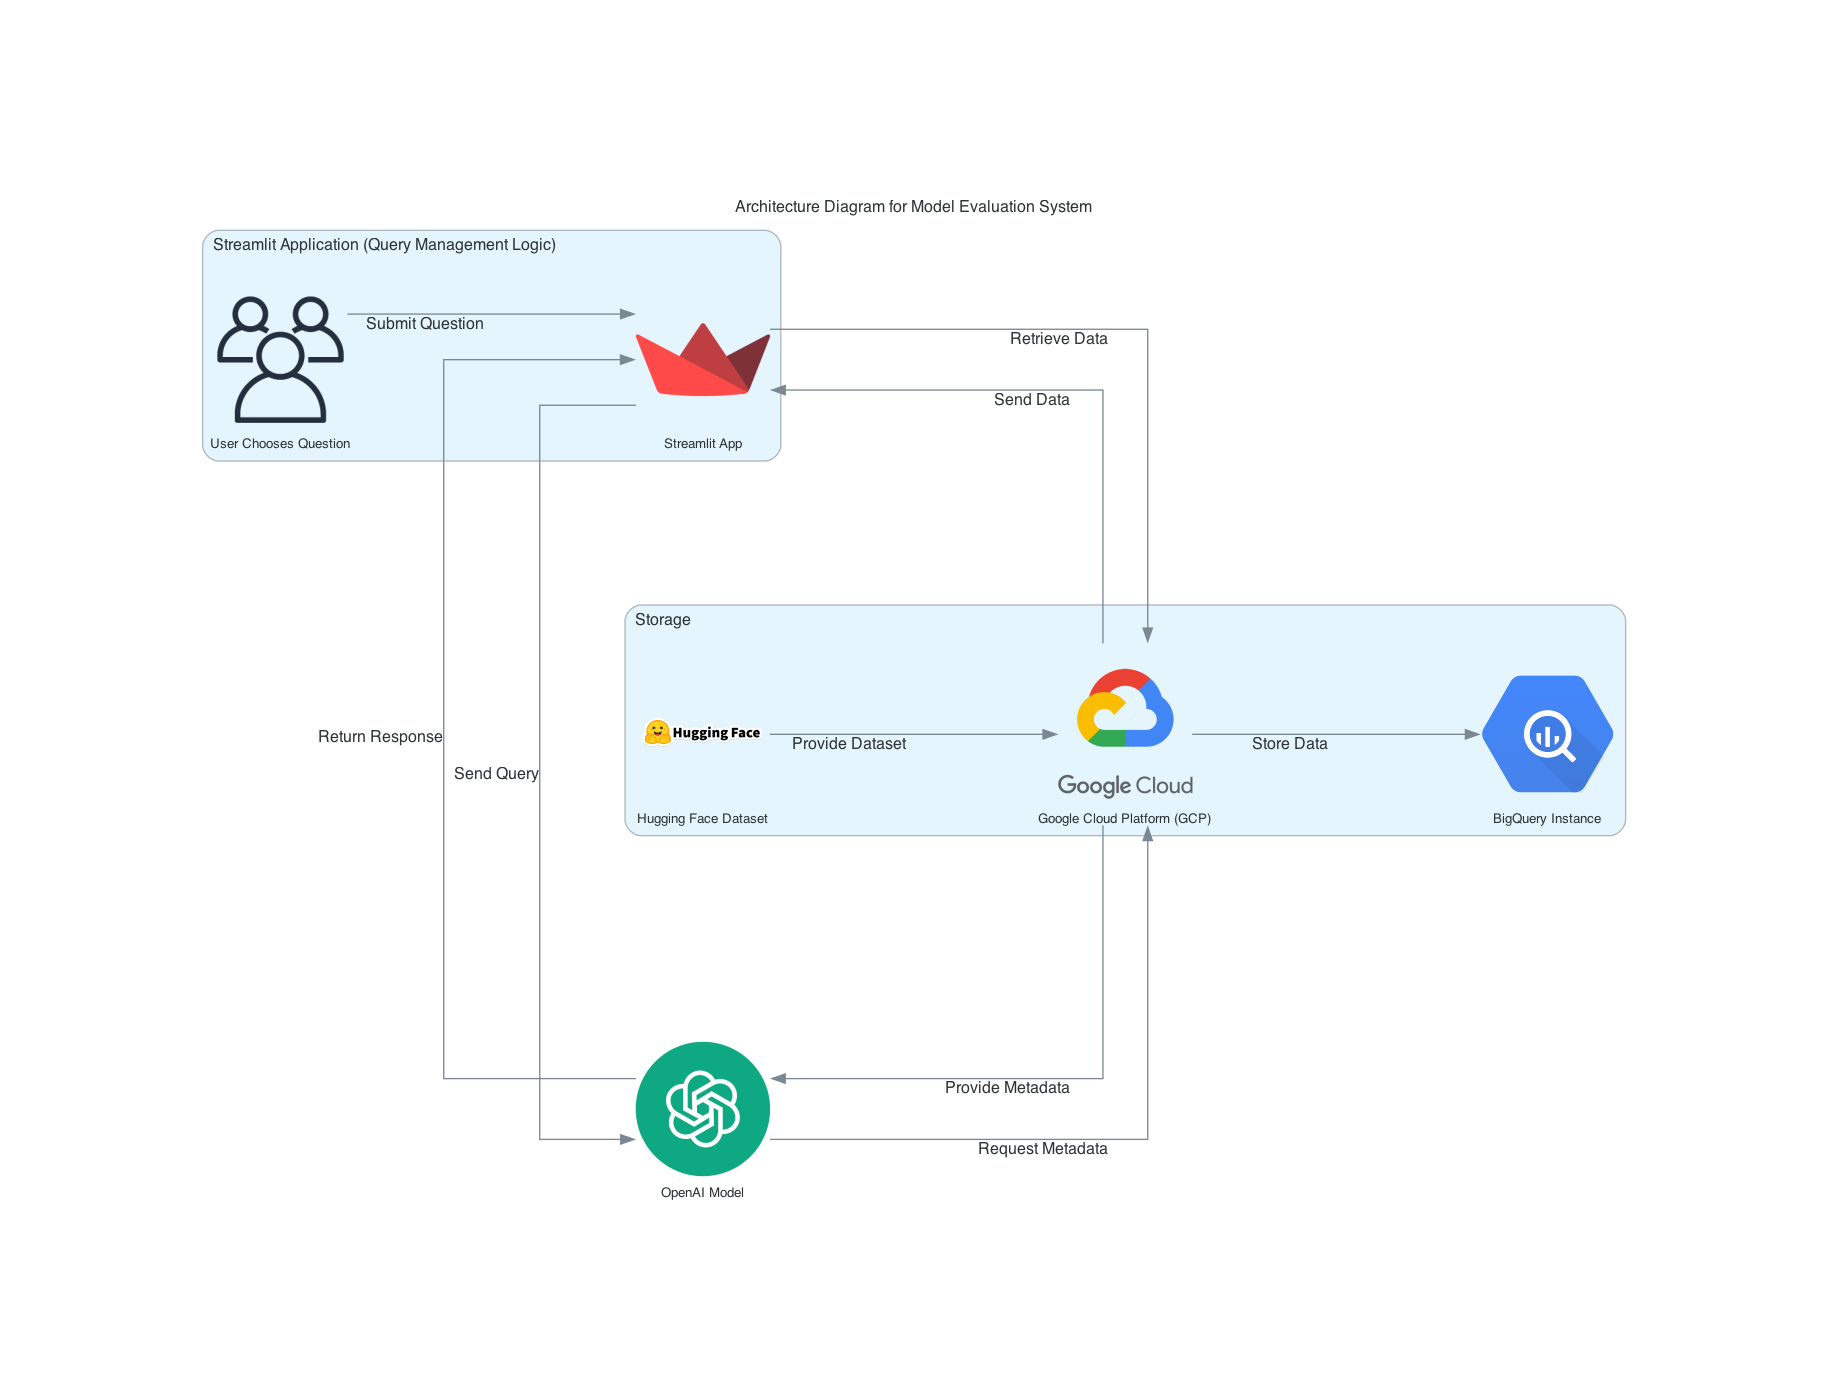

In [31]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.gcp.storage import GCS
from diagrams.programming.language import Python
from diagrams.onprem.client import Users

# Define the paths to the custom icons
streamlit_logo = "streamlit_logo.png"
openai_logo = "openai_logo.png"
gcp_logo = "gcp_logo.png"
bigquery_logo = "bigquery_logo.png"  # BigQuery logo path
huggingface_logo = "huggingface_logo.png"  # Hugging Face logo path

# Diagram graph attributes
graph_attr = {
    "fontsize": "12",  # Reduce font size for better fit
    "labelloc": "t",
    "label": "Architecture Diagram for Model Evaluation System",
    "ranksep": "3.0",  # Increase space between levels
    "nodesep": "2.0",  # Increase space between nodes
}

node_attr = {
    "fontsize": "10"  # Adjust the font size for individual nodes
}

with Diagram("Architecture_Diagram", show=False, graph_attr=graph_attr, node_attr=node_attr, direction="LR") as diag:
    
    # Cluster for user interaction and Streamlit
    with Cluster("Streamlit Application (Query Management Logic)"):
        user = Users("User Chooses Question")
        streamlit_ui = Custom("Streamlit App", streamlit_logo)
    
    # Google Cloud Platform, BigQuery, and Hugging Face
    with Cluster("Storage"):
        gcp = Custom("Google Cloud Platform (GCP)", gcp_logo)  # Label for GCP
        database = Custom("BigQuery Instance", bigquery_logo)  # BigQuery for storage
        huggingface = Custom("Hugging Face Dataset", huggingface_logo)  # Hugging Face as a data source
    
    # OpenAI processing with custom icon
    openai = Custom("OpenAI Model", openai_logo)

    # Workflow connections with xlabels (for edge labels)
    user >> Edge(xlabel="Submit Question", fontsize="12") >> streamlit_ui  # User interacts with Streamlit UI
    
    # Direct query and response flow
    streamlit_ui >> Edge(xlabel="Send Query", fontsize="12") >> openai  # Streamlit sends query directly to OpenAI
    openai >> Edge(xlabel="Return Response", fontsize="12") >> streamlit_ui  # OpenAI sends response back to Streamlit
    
    # Metadata retrieval and data flow
    openai >> Edge(xlabel="Request Metadata", fontsize="12") >> gcp  # OpenAI requests metadata from GCP
    gcp >> Edge(xlabel="Provide Metadata", fontsize="12") >> openai  # GCP provides metadata to OpenAI
    
    # Optional: Streamlit to GCP data retrieval
    streamlit_ui >> Edge(xlabel="Retrieve Data", fontsize="12") >> gcp  # Streamlit retrieves additional data from GCP
    gcp >> Edge(xlabel="Send Data", fontsize="12") >> streamlit_ui  # GCP sends data to Streamlit
    
    # Data storage
    huggingface >> Edge(xlabel="Provide Dataset", fontsize="12") >> gcp  # Hugging Face dataset is sent to GCP
    gcp >> Edge(xlabel="Store Data", fontsize="12") >> database  # Data from GCP is stored in BigQuery

diag
